In the previous chapter, we explored basic plotting techniques using Pandas, Seaborn, and Matplotlib to create visualizations. Now, we’ll elevate our skills by diving into more advanced topics, such as crafting complex subplots and visualizing geospatial data, enabling us to build richer and more insightful plots.

To get started, let's import necessary libraries.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Matplotlib Plotting Interfaces

### Pyplot interface and OOP Interface

There are two types of interfaces in Matplotlib for visualization and these are given below:

![](https://s3.ap-south-1.amazonaws.com/s3.studytonight.com/tutorials/uploads/pictures/1596086186-71449.png)


### Plot a simple figure using two interfaces

In [54]:
gdp_data = pd.read_csv('datasets/gdp_lifeExpectancy.csv')
gdp_data.head()

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

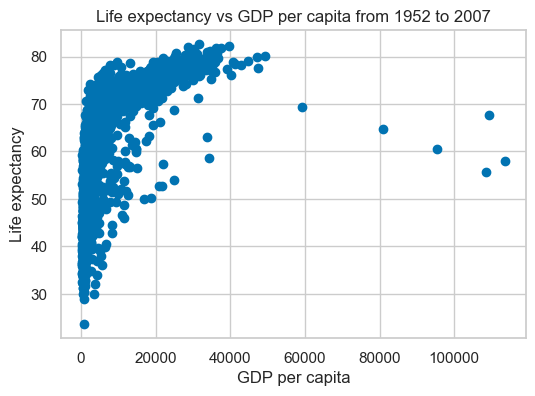

In [55]:
#Object-oriented interface
fig, ax = plt.subplots() #Create a figure and an axes
x = gdp_data.gdpPercap 
y = gdp_data.lifeExp
ax.plot(x,y,'o')   #Plot data on the axes
ax.set_xlabel('GDP per capita')    #Add an x-label to the axes
ax.set_ylabel('Life expectancy')   #Add a y-label to the axes
ax.set_title('Life expectancy vs GDP per capita from 1952 to 2007');

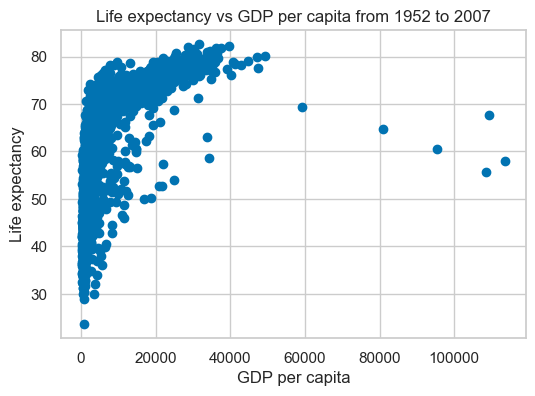

In [56]:
#pyplot interface
x = gdp_data.gdpPercap
y = gdp_data.lifeExp
plt.plot(x,y,'o') #By default, the plot() function makes a lineplot. The 'o' arguments specifies a scatterplot
plt.xlabel('GDP per capita')  #Labelling the horizontal X-axis
plt.ylabel('Life expectancy') #Labelling the verical Y-axis
plt.title('Life expectancy vs GDP per capita from 1952 to 2007');

###  Pyplot Interface
In the previous chapter,  our plotting is completely based on pyplot interface of Matplotlib, which is just for basic plotting. You can easily generate plots using pyplot module in the matplotlib library just by importing `matplotlib.pyplot` module.

* pyplot interface is a **state-based interface.** It implicitly tracks the plot that it wants to reference
* Simple functions are used to **add plot elements and/or modify the plot** as we need, whenever we need it.
* The Pyplot interface **shares a lot of similarities in syntax and methodology with MATLAB.**

However, The `pyplot` interface has limited functionality in these two cases:

* when there is a need to make multiple plots
* when we have to make plots that require a lot of customization.

For more advanced plotting with Matplotlib, you have to learn Object-Oriented Interface.

## Plotting with Object-Oriented Interface of Matplotlib

### Understanding Matplotlib Object Hierarchy


To understand the object-oriented interface of Matplotlib, we have to start with a couple of fundamental concepts related to a plot.
* Figure
* Axes


Think of the entire plot as an object hierarchy with Figure at the top of it. Here is a small subset of the hierarchy with Figure being at the top, followed by Axes ( not the same as axis ), followed by different texts on the plot, different kinds of plots it can handle, the different axis and so on. The hierarchy doesn’t stop there. Further to x-axis for example, there are ticks and further to ticks there are its subsequent properties and so on.

![](https://i0.wp.com/ajaytech.co/wp-content/uploads/2019/05/matplotlib-object-oriented-hierarchy.png?w=815&ssl=1)

#### Figure
The outermost object is the figure which is an instance of `figure.Figure`. It is the **top level container** for all the plot elements. The Figure is the final image that may contain one or more Axes and it keeps track of all the Axes. Figure is only a container and you can not plot data on figure.

In [57]:
# To begin with, we create a fiture instance which provides an empty canvas
fig = plt.figure()

<Figure size 600x400 with 0 Axes>

Figure is just a container, note that creating figure using `plt.figure()` does not automatically create an axes and hence all you can see is the figure object.

#### Axes

`Axes` is the instance of `matplotlib.axes.Axes`. Axes **is the area on which data are plotted**. A given figure can contain many Axes, but a given Axes object can only be in one Figure.

##### Creating an Axes Object Explicitly

In the OOP interface, Axes objects are usually created using `plt.subplots()` or `plt.figure().add_subplot()`.

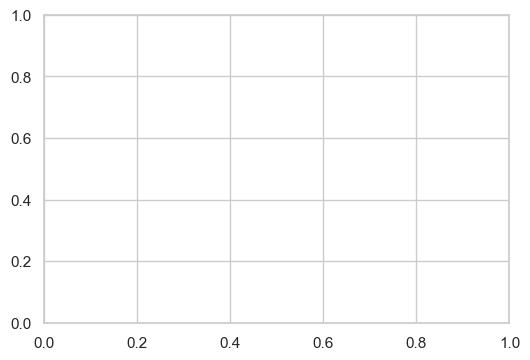

In [58]:
# A figure only contains one axes by default
fig = plt.figure()
# add axes to the figure
ax = fig.add_subplot()

We create a blank axes (area) for plotting, if we need to add more axes to the figure

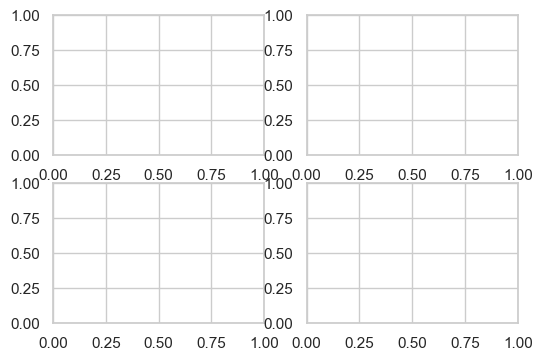

In [59]:
# create a figure with 4 axes, arranged in 2 rows and 2 columns
fig, axes = plt.subplots(2, 2)


##### Components of an Axes Object

The `Axes` object contains several elements that make up the plot

* Data plotting area: Contains the data (lines, bars, points, etc.).
* X-axis and Y-axis: Controls the axis limits, labels, and ticks.
* Title and Labels: The overall title and labels for each axis.
* Gridlines: Optional lines to help align the data visually.
* Spines: The borders around the plot.
* Legend: An optional component to explain the data series.
* Annotations: Text or arrows highlighting points of interest.

This is what makes the `Axes` object central to any plot in the OOP interface of Matplotlib.

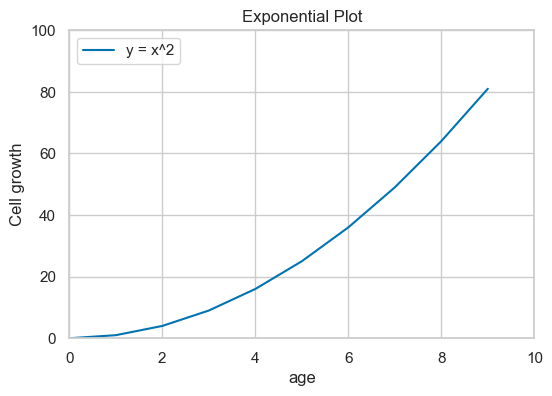

In [60]:
# create data for plotting
x = np.arange(10)
y = x**2 

# create a figure and axes
fig,ax = plt.subplots(1,1) 

# plot the data
ax.plot(x,y)

# set the title
ax.set_title("Exponential Plot")
 
# set the labels of x and y axes
ax.set_xlabel("age")
ax.set_ylabel("Cell growth")

# set the limits of x and y axes
ax.set_xlim([0, 10])
ax.set_ylim([0, 100])

# set the ticks of x and y axes
ax.set_xticks(range(0, 11, 2))
ax.set_yticks(range(0, 101, 20))

# add grid
ax.grid(True)

# add legend
ax.legend(["y = x^2"], loc = "upper left")

# show the plot
plt.show()

### Creating Complex Plots with Multiple Subplots

To help illustrate subplots in matplotlib, we can cover two scenarios:

* subplots that don't overlap and 
* subplots inside other subplots

#### Plotting non-overlapped subplots

This is the most common use case, where multiple plots are placed next to each other in a grid, without overlap. The `plt.subplots()` function allows for a clean layout where each plot is contained in its own space. You can specify the number of rows and columns to create a grid of subplots.

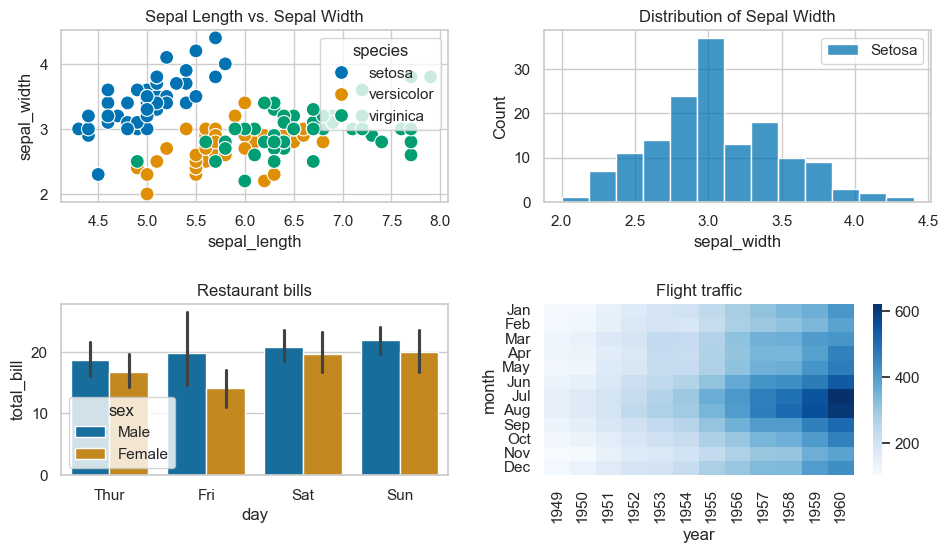

In [61]:
flowers_df = sns.load_dataset('iris')
tips_df = sns.load_dataset('tips')
flights_df = sns.load_dataset("flights").pivot(index="month", columns="year", values="passengers")


fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Pass the axes into seaborn
axes[0,0].set_title('Sepal Length vs. Sepal Width')
sns.scatterplot(x=flowers_df.sepal_length, 
                y=flowers_df.sepal_width, 
                hue=flowers_df.species, 
                s=100, 
                ax=axes[0,0])

# Use the axes for plotting
axes[0,1].set_title('Distribution of Sepal Width')
sns.histplot(flowers_df.sepal_width, ax=axes[0,1])
axes[0,1].legend(['Setosa', 'Versicolor', 'Virginica'])

# Pass the axes into seaborn
axes[1,0].set_title('Restaurant bills')
sns.barplot(x='day', y='total_bill', hue='sex', data=tips_df, ax=axes[1,0])

# Pass the axes into seaborn
axes[1,1].set_title('Flight traffic')
sns.heatmap(flights_df, cmap='Blues', ax=axes[1,1])

plt.tight_layout(pad=2)

* The `plt.tight_layout()` ensures the subplots do not overlap by adjusting the spacing automatically.
* Seaborn and pandas are wrappers of Matplotlib. To create a Seaborn/pandas plot in a specific Matplotlib subplot, you pass the `ax` parameter to the its plotting function. This allows you to use their visualization capabilities while fully controlling the layout of the plot using Matplotlib’s `plt.subplots()`

#### Plotting Nested Subplots (Subplots Inside Other Subplots)

You can create a subplot inside another plot using `add_axes()` or `inset_axes()` from matplotlib's `Axes` object. This is useful for creating insets or focusing on a specific region within a larger plot.

Syntax of `add_axes()`

`ax = fig.add_axes([left, bottom, width, height])`

where
* left: The x-position (horizontal starting point) of the axes, as a fraction of the figure width (0 to 1).
* bottom: The y-position (vertical starting point) of the axes, as a fraction of the figure height (0 to 1).
* width: The width of the axes, as a fraction of the figure width (0 to 1).
* height: The height of the axes, as a fraction of the figure height (0 to 1).

Below is an example demonstrating the use of `add_axes()`. You can also explore the `inset_axes()` method for creating inset plots with more flexibility

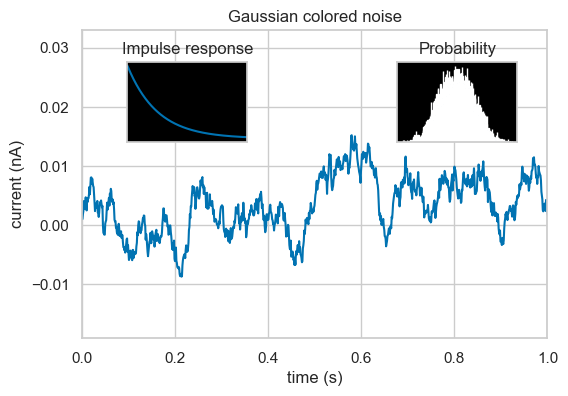

In [62]:
# create inset axes within the main plot axes  

np.random.seed(19680801)  # Fixing random state for reproducibility.

# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000] / 0.05)  # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)] * dt  # colored noise

fig, main_ax = plt.subplots()
main_ax.plot(t, s)
main_ax.set_xlim(0, 1)
main_ax.set_ylim(1.1 * np.min(s), 2 * np.max(s))
main_ax.set_xlabel('time (s)')
main_ax.set_ylabel('current (nA)')
main_ax.set_title('Gaussian colored noise')

# this is an inset axes over the main axes
right_inset_ax = fig.add_axes([.65, .6, .2, .2], facecolor='k')
right_inset_ax.hist(s, 400, density=True)
right_inset_ax.set(title='Probability', xticks=[], yticks=[])

# this is another inset axes over the main axes
left_inset_ax = fig.add_axes([.2, .6, .2, .2], facecolor='k')
left_inset_ax.plot(t[:len(r)], r)
left_inset_ax.set(title='Impulse response', xlim=(0, .2), xticks=[], yticks=[])

plt.show()

#### `pyplot`: a convenience wrapper around the object-oriented interface

While the pyplot interface is simpler for quick, basic plots, it ultimately wraps around the object-oriented structure of Matplotlib, meaning that it's built on top of the object-oriented interface.

![](https://i0.wp.com/ajaytech.co/wp-content/uploads/2019/05/title_xlabel_ylabel_source_pyplot.png?w=565&ssl=1)

## Creating Subplots with Seaborn

We previously demonstrated how Seaborn integrates seamlessly with Matplotlib’s object-oriented interface, allowing you to pass the `ax` argument to any Seaborn function, thereby directing the plot to a specific axis within a subplot grid.

Additionally, Seaborn offers a more convenient and simplified approach to creating subplots, thanks to its high-level functions and built-in integration with Matplotlib. Here’s how Seaborn makes working with subplots easier:

### Using `Facetgrid`

Seaborn’s `FacetGrid` function make it very easy to create facet grids or subplots based on data dimensions (such as categories), which would require more manual effort with Matplotlib.

You can use the `row` and `col` parameters to control how the data is split into subplots along these dimensions.

In [63]:
# Seaborn Example using FacetGrid:
tips_df = sns.load_dataset("tips")
tips_df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

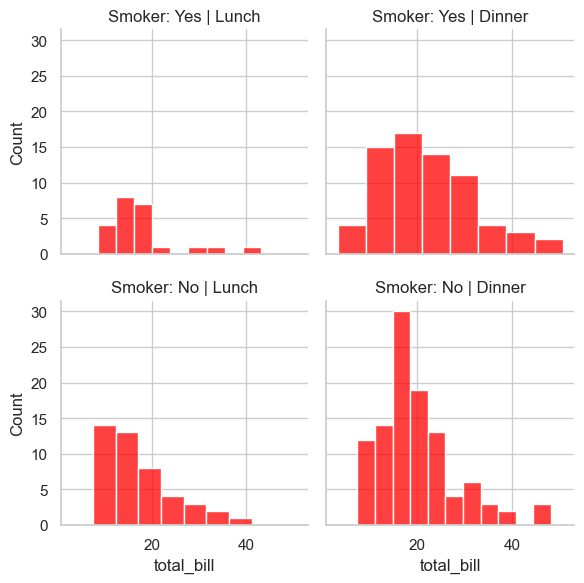

In [64]:
g = sns.FacetGrid(tips_df, col='time', row='smoker')
g.map(sns.histplot, 'total_bill', color='r')
g.set_titles(col_template="{col_name}", row_template="Smoker: {row_name}");

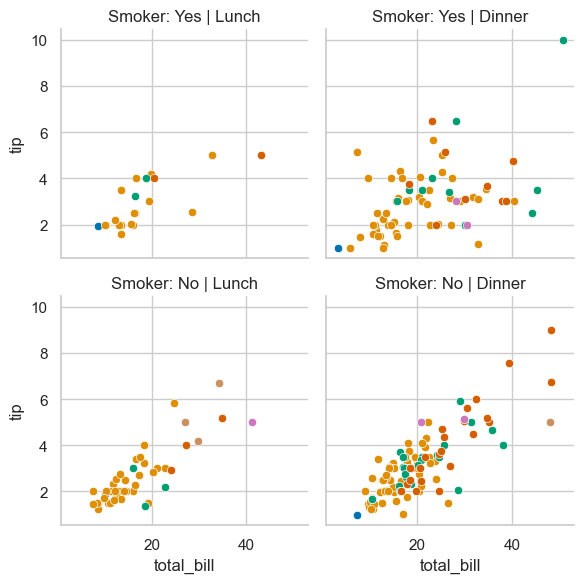

In [65]:
# adding hue to the FacetGrid
g = sns.FacetGrid(tips_df, col='time', row='smoker',hue='size')
# Plot a scatterplot of the total bill and tip for each combination of time and smoker
g.map(sns.scatterplot, 'total_bill', 'tip')
g.set_titles(col_template="{col_name}", row_template="Smoker: {row_name}");

### Using seaborn Pairplot

Pairplots are used to visualize the association between all variable-pairs in the data. In other words, pairplots simultaneously visualize the scatterplots between all variable-pairs.

Let us visualize the pair-wise association of tips variables in the tips dataset

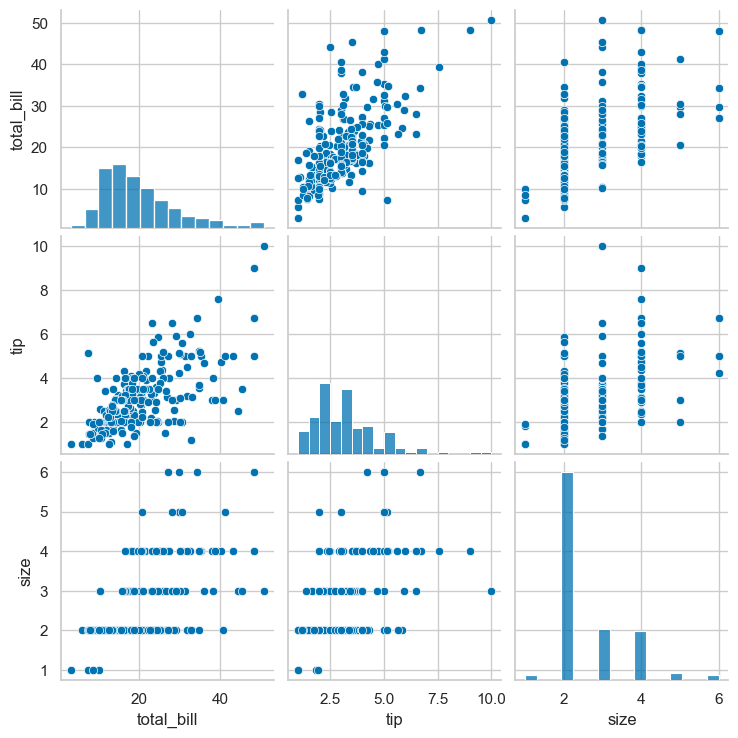

In [66]:
sns.pairplot(tips_df );

Let us visualize the pair-wise association of nutrition variables in the starbucks drinks data.

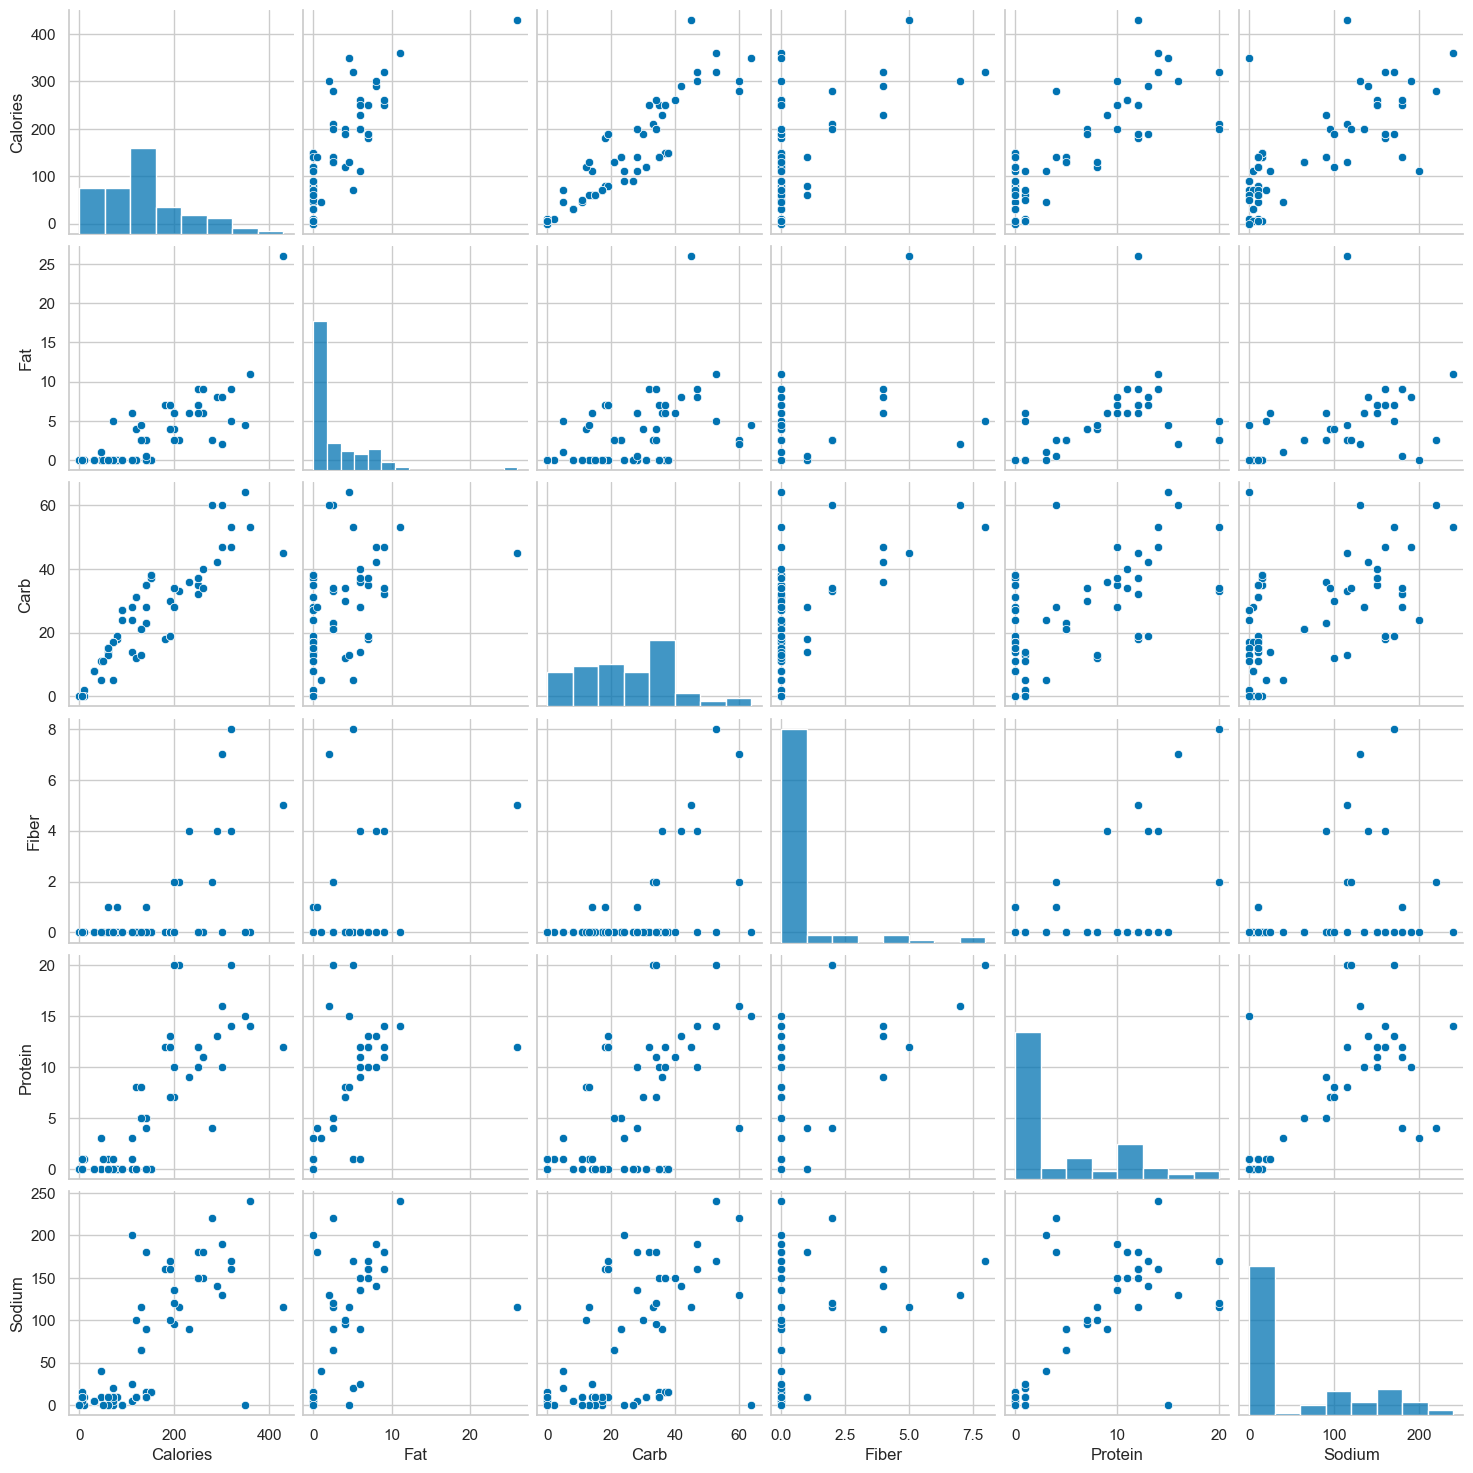

In [67]:
starbucks_drinks = pd.read_csv('datasets/starbucks-menu-nutrition-drinks.csv')
sns.pairplot(starbucks_drinks);

In the above pairplot, note that:

* The histograms on the diagonal of the grid show the distribution of each of the variables.
* Instead of a histogram, we can visualize the density plot with the argument kde = True.
* The scatterplots in the rest of the grid are the pair-wise plots of all the variables.

## Case Study

Below, we are reading the dataset of noise complaints of type Loud music/Party received the police in New York City in 2016.

In [68]:
nyc_party_complaints = pd.read_csv('datasets/party_nyc.csv')
nyc_party_complaints.head()

Created Date      Closed Date               Location Type  Incident Zip  \
0  12/31/2015 0:01  12/31/2015 3:48            Store/Commercial       10034.0   
1  12/31/2015 0:02  12/31/2015 4:36            Store/Commercial       10040.0   
2  12/31/2015 0:03  12/31/2015 0:40  Residential Building/House       10026.0   
3  12/31/2015 0:03  12/31/2015 1:53  Residential Building/House       11231.0   
4  12/31/2015 0:05  12/31/2015 3:49  Residential Building/House       10033.0   

       City    Borough   Latitude  Longitude  Hour_of_the_day  \
0  NEW YORK  MANHATTAN  40.866183 -73.918930                0   
1  NEW YORK  MANHATTAN  40.859324 -73.931237                0   
2  NEW YORK  MANHATTAN  40.799415 -73.953371                0   
3  BROOKLYN   BROOKLYN  40.678285 -73.994668                0   
4  NEW YORK  MANHATTAN  40.850304 -73.938516                0   

   Month_of_the_year  
0                 12  
1                 12  
2                 12  
3                 12  
4                 12

Below, we will begin with basic plotting, utilizing Matplotlib’s object-oriented interface to handle more complex tasks, such as setting the major axis formatting. When it comes to advanced customization, Matplotlib’s object-oriented interface offers greater flexibility and control compared to the pyplot interface.

#### Bar plots with Pandas

**Purpose of bar plots**: Barplots are used to visualize any aggregate statistics of a continuous variable with respect to the categories or levels of a categorical variable. 

Bar plots can be made using the pandas `bar` function with the DataFrame or Series, just like the line plots and scatterplots.

Let us visualise the locations from where the the complaints are coming.

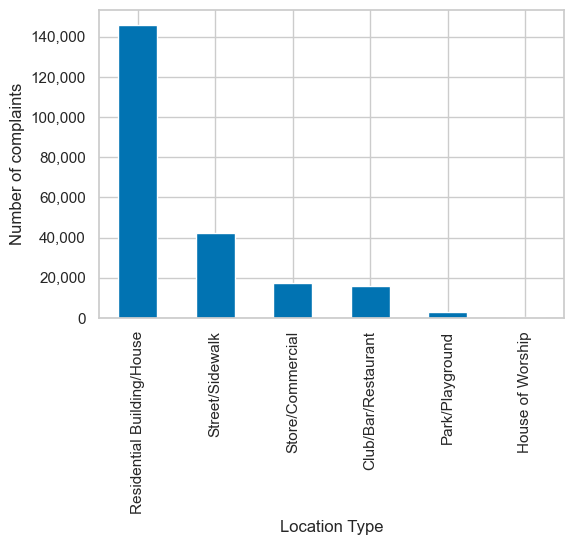

In [69]:
ax = nyc_party_complaints['Location Type'].value_counts().plot.bar(ylabel = 'Number of complaints')
ax.yaxis.set_major_formatter('{x:,.0f}')

In the above code, we use `ax.yaxis.set_major_formatter` to format the y-axis labels in a currency style.
From the above plot, we observe that most of the complaints come from residential buildings and houses, as one may expect.

For categorical variables, we can use the `.value_counts()` method to get the statistical frequency of each unique value.

In [70]:
nyc_party_complaints['Location Type'].value_counts()

Location Type
Residential Building/House    146040
Street/Sidewalk                42353
Store/Commercial               17617
Club/Bar/Restaurant            15766
Park/Playground                 3036
House of Worship                 602
Name: count, dtype: int64

Next, Let is visualize the time of the year when most complaints occur.

In [71]:
nyc_party_complaints['Month_of_the_year'].value_counts()

Month_of_the_year
6     25933
5     25192
9     25000
7     24502
8     20833
10    19332
4     17718
12    15730
11    14146
3     13880
1     12171
2     10977
Name: count, dtype: int64

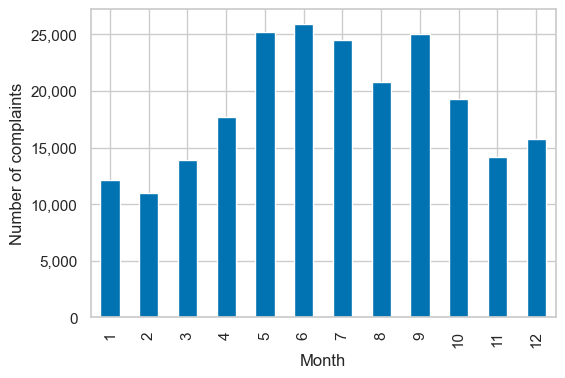

In [72]:
#Using the pandas function bar() to create bar plot
ax = nyc_party_complaints['Month_of_the_year'].value_counts().sort_index().plot.bar(ylabel = 'Number of complaints',
                                                                              xlabel = "Month")
ax.yaxis.set_major_formatter('{x:,.0f}')

Try executing the code without `sort_index()` to figure out the purpose of using the function.

From the above plot, we observe that most of the complaints occur during summer and early Fall.

Let us create a stacked bar chart that combines both the above plots into a single plot. You may ignore the code used for re-shaping the data until Chapter 10. The purpose here is to show the utility of the pandas `bar()` function.

In [73]:
#Reshaping the data to make it suitable for a stacked barplot - ignore this code until chapter 8
complaints_location=pd.crosstab(nyc_party_complaints.Month_of_the_year, nyc_party_complaints['Location Type'])
complaints_location.head()

Location Type      Club/Bar/Restaurant  House of Worship  Park/Playground  \
Month_of_the_year                                                           
1                                  748                24               17   
2                                  570                29               16   
3                                  747                39               90   
4                                  848                53              129   
5                                 2091                72              322   

Location Type      Residential Building/House  Store/Commercial  \
Month_of_the_year                                                 
1                                        9393              1157   
2                                        8383              1197   
3                                        9689              1480   
4                                       11984              1761   
5                                       15676              1941   

Location Type      Street/Sidewalk  
Month_of_the_year                   
1                              832  
2                              782  
3                             1835  
4                             2943  
5                             5090

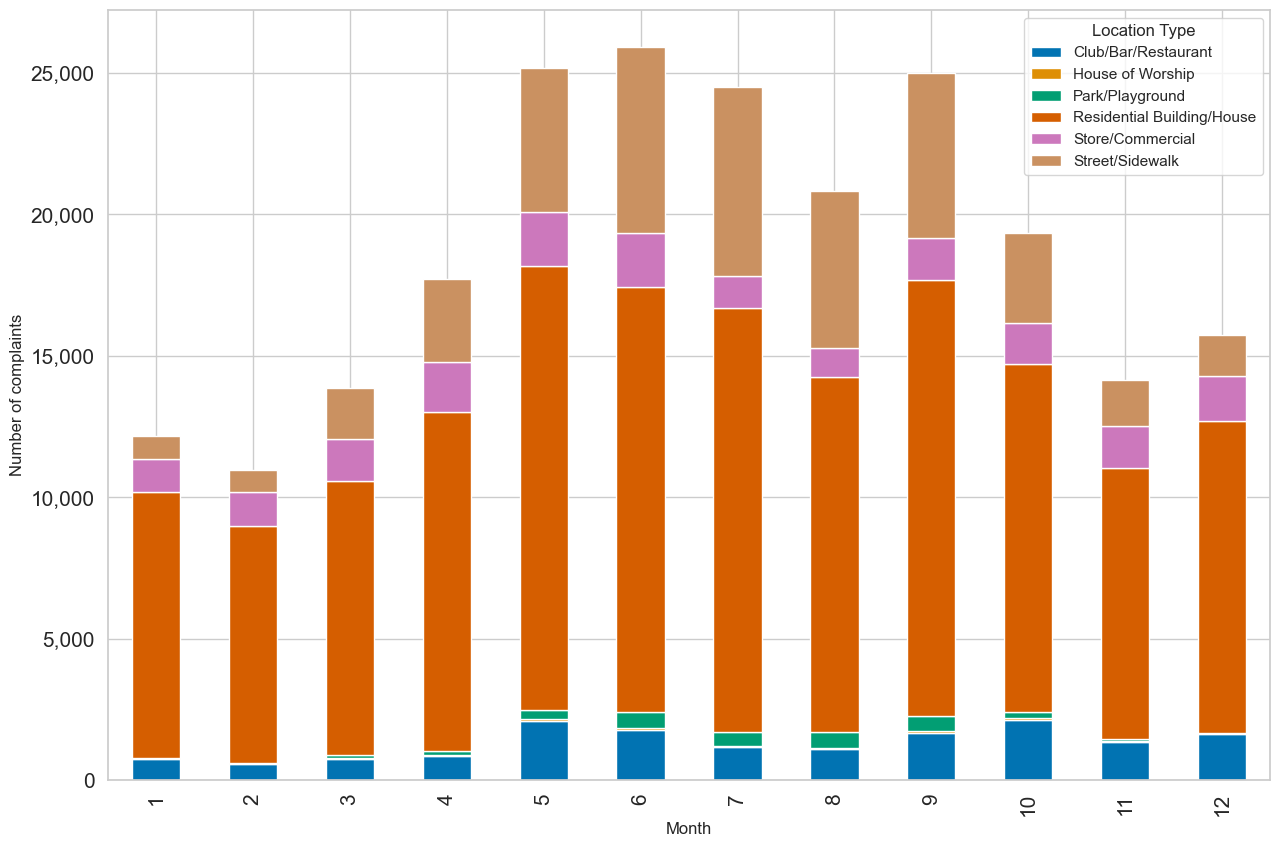

In [74]:
#Stacked bar plot showing number of complaints at different months of the year, and from different locations
ax = complaints_location.plot.bar(stacked=True,ylabel = 'Number of complaints',figsize=(15, 10), xlabel = 'Month')
ax.tick_params(axis = 'both',labelsize=15)
ax.yaxis.set_major_formatter('{x:,.0f}')

The above plots gives the insights about location and day of the year simultaneously that were previously separately obtained by the individual plots.

An alternative to stacked barplots are side-by-side barplots, as shown below.

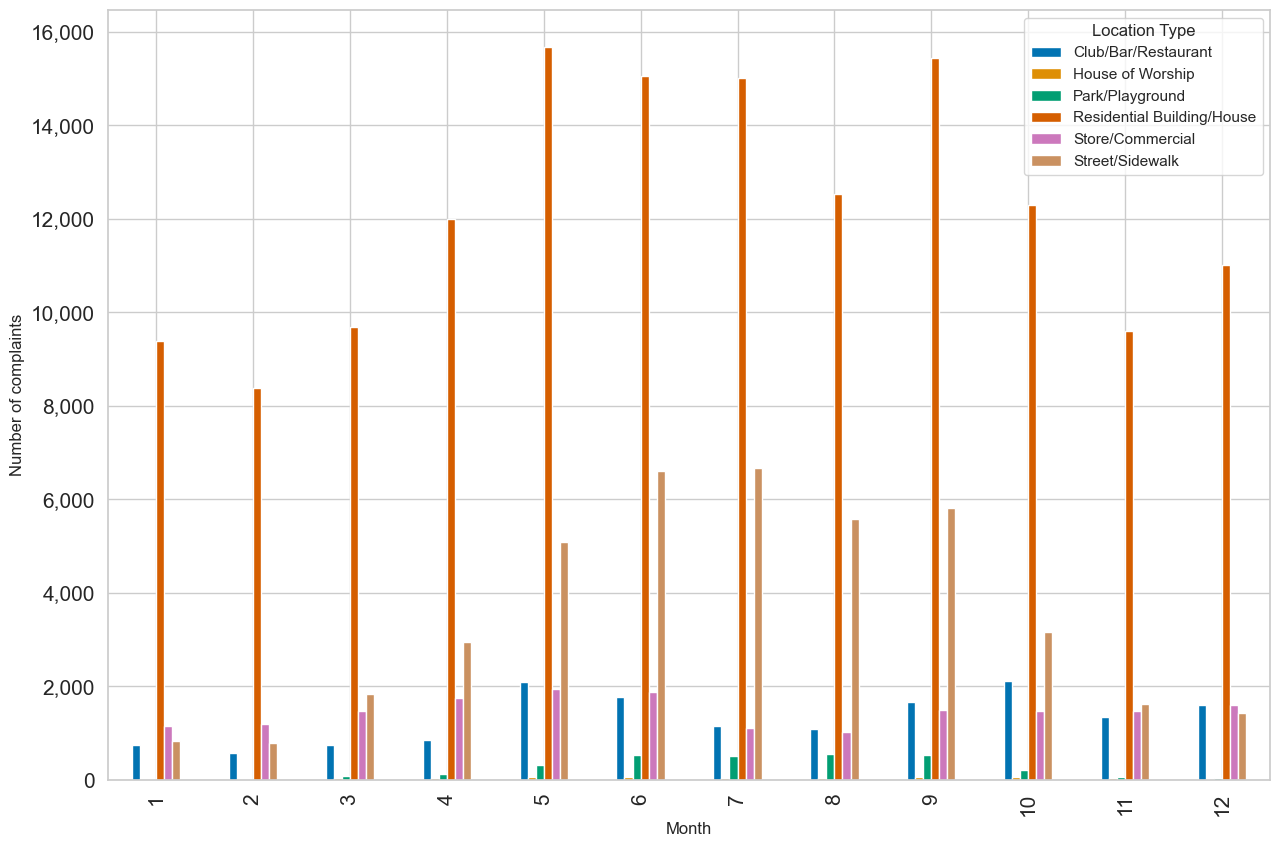

In [75]:
#Side-by-side bar plot showing number of complaints at different months of the year, and from different locations
ax = complaints_location.plot.bar(ylabel = 'Number of complaints',figsize=(15, 10), xlabel = 'Month')
ax.tick_params(axis = 'both',labelsize=15)
ax.yaxis.set_major_formatter('{x:,.0f}')

Question: In which scenarios should we use a stacked barplot instead of a side-by-side barplot and vice-versa?

#### Bar plots with confidence intervals with Seaborn

We’ll group the data to obtain the total complaints for each *Location Type, Borough, Month_of_the_year, and Hour_of_the_day*. Note that you’ll learn grouping data in later chapters, so you may ignore the next code block. The grouping is done to shape the data in a suitable form for visualization.

In [76]:
#Grouping the data to make it suitable for visualization using Seaborn. Ignore this code block until learn chapter 9.
nyc_complaints_grouped = nyc_party_complaints[['Location Type','Borough','Month_of_the_year','Latitude','Hour_of_the_day']].groupby(['Location Type','Borough','Month_of_the_year','Hour_of_the_day'])['Latitude'].agg([('complaints','count')]).reset_index()
nyc_complaints_grouped.head()


Location Type Borough  Month_of_the_year  Hour_of_the_day  complaints
0  Club/Bar/Restaurant   BRONX                  1                0          10
1  Club/Bar/Restaurant   BRONX                  1                1          10
2  Club/Bar/Restaurant   BRONX                  1                2           6
3  Club/Bar/Restaurant   BRONX                  1                3           6
4  Club/Bar/Restaurant   BRONX                  1                4           3

Let us create a bar plot visualizing the average number of complaints with the time of the day.

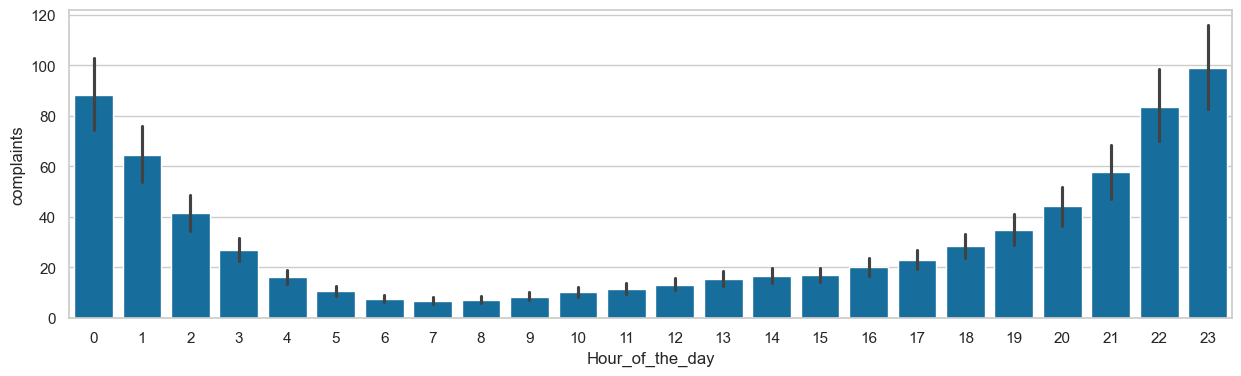

In [77]:
ax = sns.barplot(x="Hour_of_the_day", y = 'complaints',  data=nyc_complaints_grouped)
ax.figure.set_figwidth(15)

From the above plot, we observe that most of the complaints are made around midnight. However, interestingly, there are some complaints at each hour of the day.

Note that the above barplot shows the mean number of complaints in a month at each hour of the day. The black lines are the 95% confidence intervals of the mean number of complaints.

### Use Seaborn FacetGrid to Quickly Create Figures With Subplots

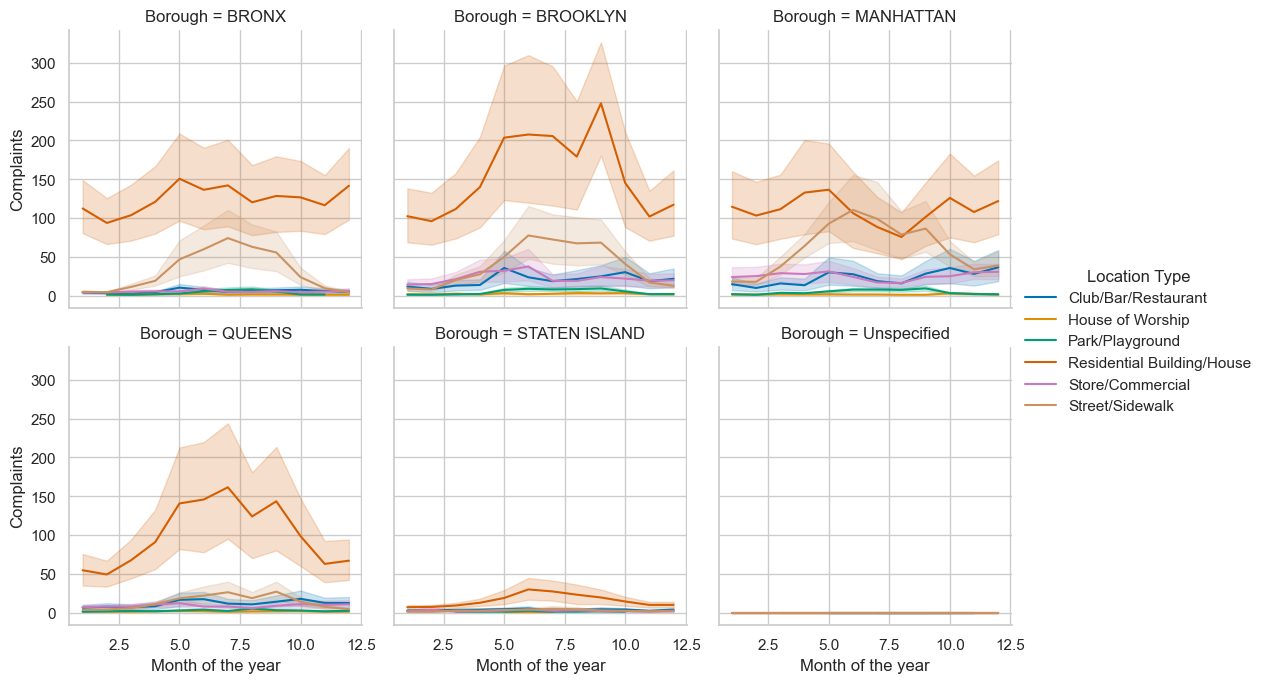

In [78]:
#Visualizing the number of complaints with Month_of_the_year, Location Type, and Borough.
a = sns.FacetGrid(nyc_complaints_grouped, hue = 'Location Type', col = 'Borough',col_wrap=3,height=3.5,aspect = 1)
a.map(sns.lineplot,'Month_of_the_year','complaints')
a.set_axis_labels("Month of the year", "Complaints")
a.add_legend()

## Geosptial Plotting

There are several widely used Python packages pecifically designed for working with geospatial datasets. In this lesson, we will cover:

* GeoPandas
* Folium

Let's import them

In [79]:
import geopandas as gpd
import geopandas 
import folium
import geodatasets

### Static Plots with GeoPandas

<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
C:\Users\lsi8012\AppData\Local\Temp\ipykernel_14232\2125888739.py:5: SyntaxWarning: invalid escape sequence '\g'
  chicago = gpd.read_file('datasets/chicago_boundaries\geo_export_26bce2f2-c163-42a9-9329-9ca6e082c5e9.shp')


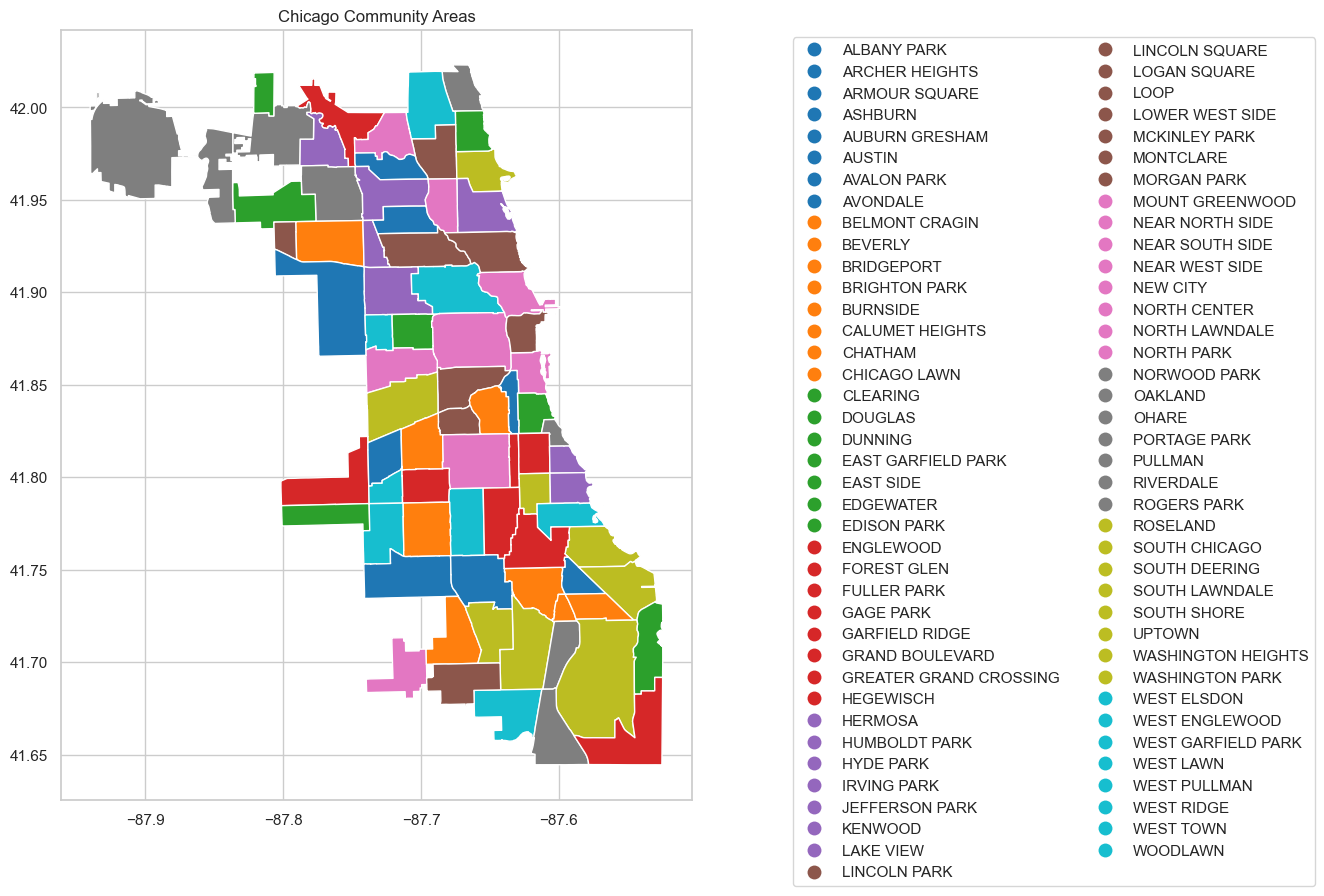

In [80]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot your GeoDataFrame
chicago = gpd.read_file('datasets/chicago_boundaries\geo_export_26bce2f2-c163-42a9-9329-9ca6e082c5e9.shp')
chicago.plot(column='community', ax=ax, legend=True, legend_kwds={'ncol': 2, 'bbox_to_anchor': (2, 1)})

# Add title (optional)
plt.title('Chicago Community Areas')

# Show the plot
plt.show();

### Dataset: Bicycle Sharing in Chicago


<p align="center">
  <img src="https://d21xlh2maitm24.cloudfront.net/chi/DivvyLogo_p_v2.svg?mtime=20170608140727"/>
</p>

Divvy is Chicagoland’s bike share system (in collaboration with Chicago Department of Transportation), with 6,000 bikes available at 570+ stations across Chicago and Evanston. Divvy provides residents and visitors with a convenient, fun and affordable transportation option for getting around and exploring Chicago.

Divvy, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the region. The bikes can be unlocked from one station and returned to any other station in the system. People use bike share to explore Chicago, commute to work or school, run errands, get to appointments or social engagements, and more.

Divvy is available for use 24 hours/day, 7 days/week, 365 days/year, and riders have access to all bikes and stations across the system.

We will be using divvy trips in the year of 2013

In [81]:
# read the csv file'divvy_2013.csv' into pandas pandas dataframe
data = pd.read_csv('datasets/divvy_2013.csv')
data.head()

trip_id    usertype gender            starttime             stoptime  \
0     3940  Subscriber   Male  2013-06-27 01:06:00  2013-06-27 09:46:00   
1     4095  Subscriber   Male  2013-06-27 12:06:00  2013-06-27 12:11:00   
2     4113  Subscriber   Male  2013-06-27 11:09:00  2013-06-27 11:11:00   
3     4118    Customer    NaN  2013-06-27 12:11:00  2013-06-27 12:16:00   
4     4119  Subscriber   Male  2013-06-27 11:12:00  2013-06-27 11:13:00   

   tripduration  from_station_id             from_station_name  \
0         31177               91  Clinton St & Washington Blvd   
1           301               85         Michigan Ave & Oak St   
2           140               88          May St & Randolph St   
3           316               85         Michigan Ave & Oak St   
4            87               88          May St & Randolph St   

   latitude_start  longitude_start  ...  dewpoint  humidity pressure  \
0        41.88338       -87.641170  ...      64.9      96.0    29.75   
1        41.90096       -87.623777  ...      69.1      55.0    29.75   
2        41.88397       -87.655688  ...      70.0      61.0    29.75   
3        41.90096       -87.623777  ...      69.1      55.0    29.75   
4        41.88397       -87.655688  ...      70.0      61.0    29.75   

   visibility  wind_speed  precipitation        events  rain  \
0         7.0         0.0        -9999.0  partlycloudy     0   
1        10.0        13.8        -9999.0  mostlycloudy     0   
2        10.0        10.4        -9999.0  mostlycloudy     0   
3        10.0        13.8        -9999.0  mostlycloudy     0   
4        10.0        10.4        -9999.0  mostlycloudy     0   

         conditions  month  
0  Scattered Clouds      6  
1     Mostly Cloudy      6  
2     Mostly Cloudy      6  
3     Mostly Cloudy      6  
4     Mostly Cloudy      6  

[5 rows x 28 columns]

Below are basic data cleaning

In [82]:
# drop the duplicates in the column 'to_station_id', 'to_station_name', 'latitude_end', 'longitude_end'
data_station_same = data[['from_station_id', 'from_station_name', 'latitude_start', 'longitude_start', 'to_station_id', 'to_station_name', 'latitude_end', 'longitude_end']].drop_duplicates()
data_station_same.shape

(1757, 8)

### Adding the divvy station to the plot

<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\g'
C:\Users\lsi8012\AppData\Local\Temp\ipykernel_14232\1459074587.py:4: SyntaxWarning: invalid escape sequence '\g'
  chicago = gpd.read_file('datasets/chicago_boundaries\geo_export_26bce2f2-c163-42a9-9329-9ca6e082c5e9.shp')


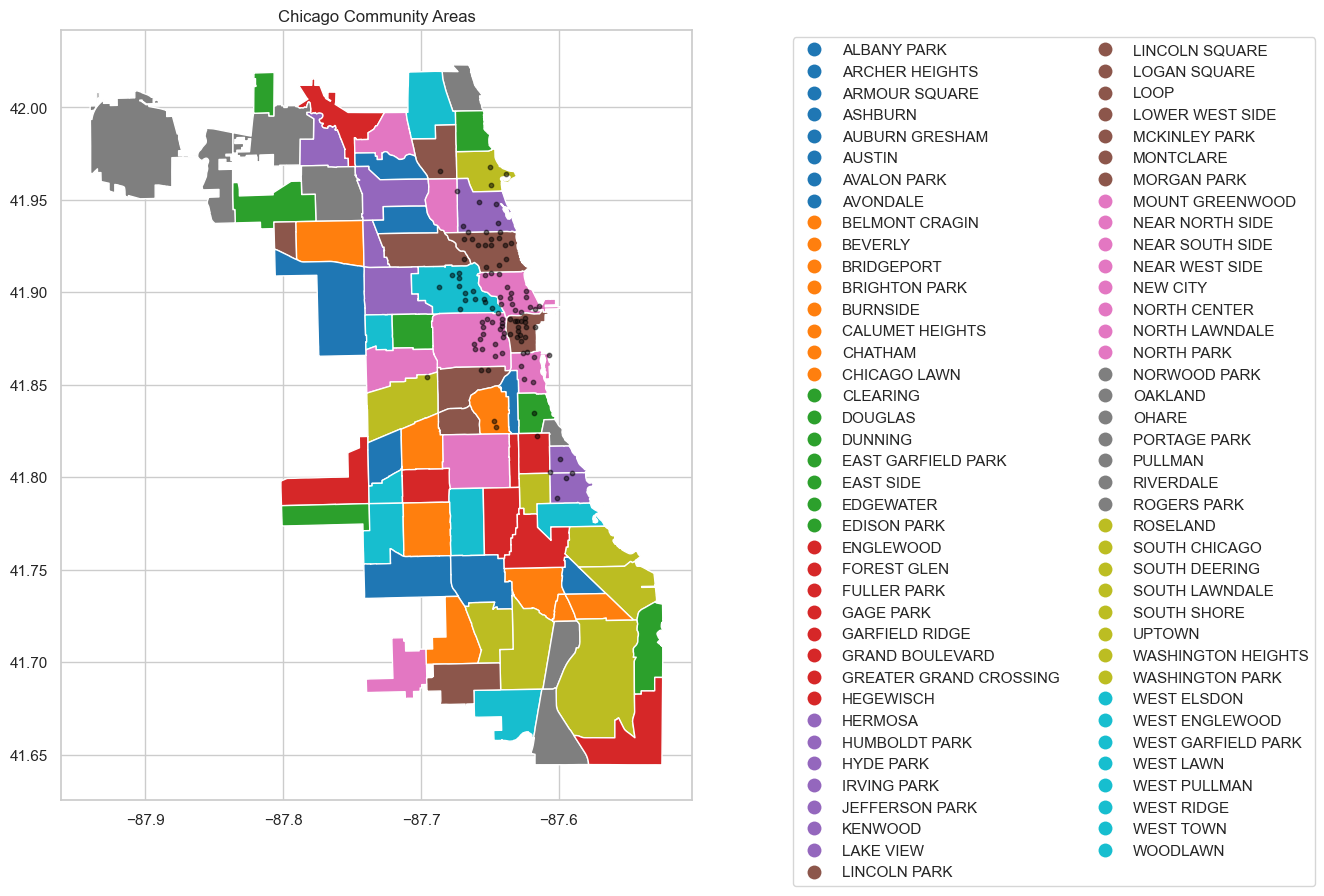

In [83]:
# Adding the stations to the plot
fig, ax = plt.subplots(figsize=(15, 10))

chicago = gpd.read_file('datasets/chicago_boundaries\geo_export_26bce2f2-c163-42a9-9329-9ca6e082c5e9.shp')
chicago.plot(column='community', ax=ax, legend=True, legend_kwds={'ncol': 2, 'bbox_to_anchor': (2, 1)})

# Plot the stations
longlat_df = data[[ 'latitude_start', 'longitude_start']].drop_duplicates()

plt.scatter(longlat_df['longitude_start'], longlat_df['latitude_start'], s=10, alpha=0.5, color='black', marker='o')
# data[['longitude_start', 'latitude_start']].drop_duplicates().plot(ax=ax, color='red', markersize=10, marker='o')

# Add title (optional)
plt.title('Chicago Community Areas')

# Show the plot
plt.show()

### Change the chicago shapefile

Text(0.5, 1.0, 'Chicago Community Areas')

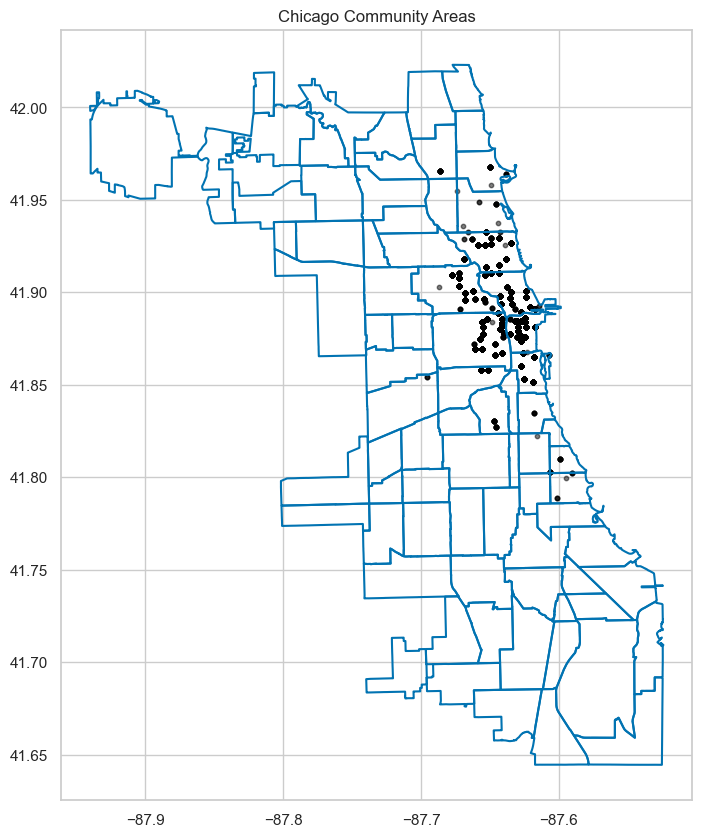

In [84]:
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))

# Plot the data
fig, ax = plt.subplots(figsize=(15, 10))
chicago.boundary.plot(ax=ax)
plt.scatter(data['longitude_start'], data['latitude_start'], s=10, alpha=0.5, color='black', marker='o')
plt.title('Chicago Community Areas')

### Interactive Plotting 

Alongside static plots, `geopandas` can create interactive maps based on the [folium](https://python-visualization.github.io/folium/latest/) library.

Creating maps for interactive exploration mirrors the API of static [plots](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) in an [explore()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html) method of a GeoSeries or GeoDataFrame.

 Here’s an explanation of how `explore()` works and its key features:

Key Features of `explore()`:

1. Interactive Map Display:

* When you call explore() on a Geodataframe (gdf), it launches an interactive map widget directly within your Jupyter notebook.
* This map allows you to pan, zoom, and interact with the geometries (points, lines, polygons) in your Geodataframe.

2. Layer Control:

* explore() automatically adds the geometries from your Geodataframe as layers on the map.
* Each geometry type (points, lines, polygons) is displayed with appropriate styling and markers.

3. Tooltip Information:

* When you hover over a geometry in the map, explore() displays tooltip information that typically includes attribute data associated with that geometry.
* This feature is useful for inspecting specific details or properties of individual features in your geospatial dataset.

4. Search and Filter:

* explore() provides basic search and filter functionalities directly on the map.
* You can search for specific attribute values or filter the displayed features based on attribute criteria defined in your Geodataframe.

5. Customization:

* Although explore() provides default styling and interaction behaviors, you can customize the map further using parameters or by manipulating the Geodataframe before calling explore().

In [85]:
# use the geopandas explore default settings
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))

chicago.explore()

Adding the population layer

In [86]:
# Customerize the explore settings
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))

m = chicago.explore(
    column="POP2010",  # make choropleth based on "POP2010" column
    scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
    legend=True,  # show legend
    k=10,  # use 10 bins
    tooltip=False,  # hide tooltip
    popup=["POP2010", "POP2000"],  # show popup (on-click)
    legend_kwds=dict(colorbar=False),  # do not use colorbar
    name="chicago",  # name of the layer in the map
)

m

c:\Users\lsi8012\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The `explore()` method returns a `folium.Map` object, which can also be passed directly (as you do with `ax` in `plot()`). You can then use folium functionality directly on the resulting map. Next, let’s add the divvy station plot.

In [87]:
type(m)

folium.folium.Map

### Adding the divvy station on the interactive `Folium.Map`

We need to extract the station information from the trip dataset and add description to the station. You can skip this part

In [88]:
# Helper function for adding the description to the station
def row_to_html(row):
    row_df = pd.DataFrame(row).T
    row_df.columns = [col.capitalize() for col in row_df.columns]
    return row_df.to_html(index=False)

In [89]:
# Extracting the latitude, longitude, and station name for plotting, and also counting the number of trips from each station
grouped_df = data.groupby(['from_station_name', 'latitude_start', 'longitude_start'])['trip_id'].count().reset_index()
display(grouped_df.sort_values('trip_id', ascending=False).head())
grouped_df.rename(columns={'from_station_name':'title', 'latitude_start':'latitude', 'longitude_start':'longitude', 'trip_id':'count'}, inplace=True)
grouped_df['description'] = grouped_df.apply(lambda row: row_to_html(row), axis=1)
geometry = gpd.points_from_xy(grouped_df['longitude'], grouped_df['latitude'])
geo_df = gpd.GeoDataFrame(grouped_df, geometry=geometry)
# Optional: Assign Coordinate Reference System (CRS)
geo_df.crs = "EPSG:4326"  # WGS84 coordinate system
geo_df.head()

from_station_name  latitude_start  longitude_start  trip_id
75            Millennium Park       41.881032       -87.624084      207
54  Lake Shore Dr & Monroe St       41.881050       -87.616970      191
72      Michigan Ave & Oak St       41.900960       -87.623777      186
68   McClurg Ct & Illinois St       41.891020       -87.617300      177
73  Michigan Ave & Pearson St       41.897660       -87.623510      127

title   latitude  longitude  count  \
0  Aberdeen St & Jackson Blvd  41.877726 -87.654787     28   
1    Aberdeen St & Madison St  41.881487 -87.654752     28   
2           Adler Planetarium  41.866095 -87.607267      6   
3  Ashland Ave & Armitage Ave  41.917859 -87.668919     20   
4  Ashland Ave & Augusta Blvd  41.899643 -87.667700     27   

                                         description  \
0  <table border="1" class="dataframe">\n  <thead...   
1  <table border="1" class="dataframe">\n  <thead...   
2  <table border="1" class="dataframe">\n  <thead...   
3  <table border="1" class="dataframe">\n  <thead...   
4  <table border="1" class="dataframe">\n  <thead...   

                     geometry  
0  POINT (-87.65479 41.87773)  
1  POINT (-87.65475 41.88149)  
2   POINT (-87.60727 41.8661)  
3  POINT (-87.66892 41.91786)  
4   POINT (-87.6677 41.89964)

We can add a hover tooltip (sometimes referred to as a tooltip or tooltip popup) for each point on your Folium map. This tooltip will appear when you hover over the markers on the map, providing additional information without needing to click on them. Here’s how you can modify your existing code to include hover tooltips:

In [90]:
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))

m = chicago.explore(
    column="POP2010",  # make choropleth based on "POP2010" column
    scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
    legend=True,  # show legend
    k=10,  # use 10 bins
    tooltip=False,  # hide tooltip
    popup=["POP2010", "POP2000"],  # show popup (on-click)
    legend_kwds=dict(colorbar=False),  # do not use colorbar
    name="chicago",  # name of the layer in the map
)

geo_df.explore(
    m=m,  # pass the map object
    color="red",  # use red color on all points
    marker_kwds=dict(radius=5, fill=True),  # make marker radius 10px with fill
    tooltip="description",  # show "name" column in the tooltip
    tooltip_kwds=dict(labels=False),  # do not show column label in the tooltip
    name="divstation",  # name of the layer in the map
)
 
m

c:\Users\lsi8012\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Independent Study

### Multiple plots in a single figure using Seaborn

**Purpose:** Histogram and density plots visualize the distribution of a continuous variable.

A histogram plots the number of observations occurring within discrete, evenly spaced bins of a random variable, to visualize the distribution of the variable. It may be considered a special case of a bar plot as bars are used to plot the observation counts.

A density plot uses a kernel density estimate to approximate the distribution of random variable.

Using the tips_df dataset

#### 

Make a histogram showing the distributions of total bill on each day of the week 

####

Make a density plot showing the distributions of total bills on each day. 